In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# 最急降下法

In [2]:
# data
df = pd.read_csv('sample_data.csv')
print(df.shape)
df.head(3)

(10, 2)


,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='space', ylabel='rent'>

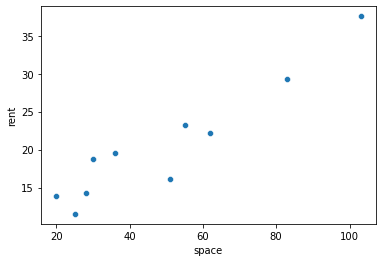

In [3]:
# scatterplot
sns.scatterplot('space', 'rent', data=df)

In [4]:
# 損失関数
def cost_func(theta_0, theta_1, x, y):
    diff_squared = np.square(y - (theta_0 + theta_1*x))
    return np.mean(diff_squared)

# def cost_func(val1, val2, xi, yi):
#     diff_list = []
#     for x, y in zip(xi, yi):
#         diff = (y - (val1 + val2*x))**2
#         diff_list.append(diff)
#     return np.mean(diff_list)

In [5]:
cost = cost_func(10, 0.1, df['space'], df['rent'])
cost

59.21797278616354

## 可視化

In [6]:
from itertools import product

x = df['space']
y = df['rent']
theta_0 = np.linspace(-20, 20, 100)
theta_1 = np.linspace(-1, 1, 100)
cost = [cost_func(*param, x=x, y=y) for param in product(theta_0, theta_1)]
np.array(cost).shape

(10000,)

In [7]:
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)
cost = np.array(cost).reshape(theta_1_ax.shape)
print(theta_0_ax.shape, theta_1_ax.shape, cost.shape)

(100, 100) (100, 100) (100, 100)


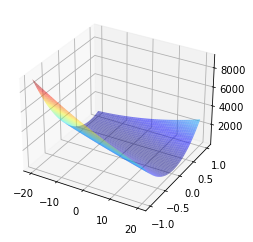

In [8]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)

In [9]:
list(product(theta_0, theta_1))[:5]

[(-20.0, -1.0),
 (-20.0, -0.9797979797979798),
 (-20.0, -0.9595959595959596),
 (-20.0, -0.9393939393939394),
 (-20.0, -0.9191919191919192)]

In [10]:
theta_0_ax

array([[-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       ...,
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ],
       [-20.        , -19.5959596 , -19.19191919, ...,  19.19191919,
         19.5959596 ,  20.        ]])

## パラメータ更新の実装

In [11]:
def update_theta(theta_0, theta_1, alpha, x, y):
    theta_0_updated = theta_0 - (alpha * np.mean((theta_0 + theta_1*x - y))*2)
    theta_1_updated = theta_1 - (alpha * np.mean((theta_0 + theta_1*x - y)*x)*2)
    return theta_0_updated, theta_1_updated

In [12]:
# update_history = []
epochs = 100000
alpha = 5e-5
# loss_min, theta_0_min, theta_1_min = None, None, None
theta_0_int = -5
theta_1_int = -0.5
x = df['space']
y = df['rent']
theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_int)
theta_1_hist.append(theta_1_int)

for _ in range(epochs):
    theta_0, theta_1 = update_theta(theta_0_hist[-1], theta_1_hist[-1], alpha, x, y)
    theta_0_hist.append(theta_0)
    theta_1_hist.append(theta_1)

# for _ in range(epochs):
#     loss = cost_func(theta_0, theta_1, x, y)
#     update_history.append({f'theta_0: {theta_0}, theta_1: {theta_1}': loss})
#     theta_0, theta_1 = update_theta(theta_0, theta_1, alpha, x, y)

# print(f'loss_min: {loss_min}, theta_0: {theta_0_min}, theta_1: {theta_1_min}')

In [13]:
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


In [14]:
hist_set = set(theta_0_hist)
len(hist_set)

100001

## 推移をプロット

In [15]:
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

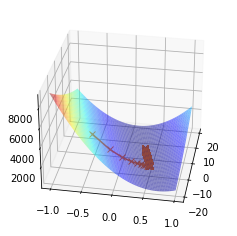

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, cost, cmap='jet', alpha=0.5)
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

Text(0, 0.5, 'theta_0')

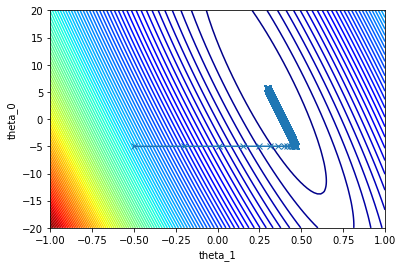

In [29]:
plt.contour(theta_1_ax.T, theta_0_ax.T, cost, levels=100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')
plt.xlabel('theta_1')
plt.ylabel('theta_0')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


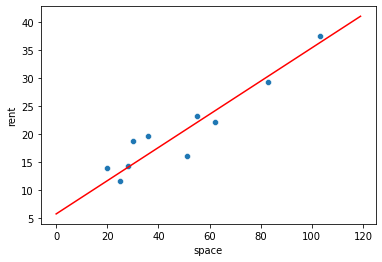

In [40]:
sns.scatterplot('space', 'rent', data=df)
diff_squared = np.square(y - (theta_0 + theta_1*x))

x_value = np.arange(120)
y_value = theta_0_hist[-1] + theta_1_hist[-1]*x_value

plt.plot(x_value, y_value, 'r')